<a href="https://colab.research.google.com/github/Flying010/DeepFakeAudioiProject/blob/main/Logistic_Regression_DeepFakeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
news_dataset = pd.read_csv('/content/gdrive/My Drive/fake-news/train.csv')
#test_dataset = pd.read_csv('/content/gdrive/My Drive/fake-news/test.csv')
#submit_dataset = pd.read_csv('/content/gdrive/My Drive/fake-news/submit.csv')
#test_dataset['label'] = submit_dataset['label']

#frames = [final, test_dataset]

#news_dataset = pd.concat(frames)

#new_dataset = pd.concat(news_dataset, test_dataset)

In [ ]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#Replacing the missing values with empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# Merge title and author cols
news_dataset['content'] = news_dataset['author']+ ' '+ news_dataset['title']

In [ ]:
#Separating the target and features
X = news_dataset['text']
X

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object

In [ ]:
Y = news_dataset['label']
Y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [ ]:
X = news_dataset['text'].values
Y = news_dataset['label'].values

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_vectorizer.fit(X)
X = tfidf_vectorizer.transform(X)

In [ ]:
print(X)

  (0, 153220)	0.05082122151984787
  (0, 153171)	0.011770203523497351
  (0, 153161)	0.012336509156248378
  (0, 152086)	0.04576160147219652
  (0, 152080)	0.09820098579353306
  (0, 152012)	0.03916930616277557
  (0, 151954)	0.014386797183891836
  (0, 151296)	0.02706228221956943
  (0, 150140)	0.017694497124772994
  (0, 149917)	0.030283022896215515
  (0, 149813)	0.014878675867274408
  (0, 149567)	0.01280064676267399
  (0, 148441)	0.02951262087699227
  (0, 148415)	0.022345596603050074
  (0, 148391)	0.018263747906452597
  (0, 146175)	0.01618233206529742
  (0, 145349)	0.06765942182213462
  (0, 144431)	0.03602584554115439
  (0, 144104)	0.018265926456449977
  (0, 142986)	0.04196216918918574
  (0, 142202)	0.04469971779395953
  (0, 142126)	0.058695836592839216
  (0, 142124)	0.08328161758350569
  (0, 141960)	0.025999795793899244
  (0, 141947)	0.024996020990469162
  :	:
  (20799, 6944)	0.028954921437880678
  (20799, 6873)	0.016355343868810365
  (20799, 6790)	0.04041306139745721
  (20799, 5578)	0.0191

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, stratify= Y, random_state = 2)
X_test.shape
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0, stratify= Y, random_state = 1)

(4160, 180133)

In [ ]:
#Model Training
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#Acc score on training data
train_prediction = model.predict(X_train)
train_acc = accuracy_score(Y_train, train_prediction)
#train_acc = accuracy_score(train_prediction, Y_train)
print("Training data accuracy:", train_acc)

Training data accuracy: 0.9756610576923077


In [ ]:
# Logistic Regression Acc score on test data
test_prediction = model.predict(X_test)
test_acc = accuracy_score(test_prediction, Y_test)
print("Test data accuracy:", test_acc)

Test data accuracy: 0.940625


In [ ]:
#Data to calculate accuracy test data set
test_ratio = [0]*(1+len(Y_test))
test_id = [0]*(1+len(Y_test))
index = 0
cnt = 0

final_length = 0

for i in range(0,len(test_prediction)):
  #print(ratio[index])
  index += 1

  #print(ratio)
  if(test_prediction[i] == Y_test[i]):
    cnt += 1
  test_ratio[index] = (cnt/(index))
  test_id[index] = index
  if(i % 100 == 0):
    #print(final_length)
    final_length+=1

In [ ]:
#Final data to plot a few points of test data
test_finalratio = [0]*(final_length)
test_finalid = [0]*(final_length)

for i in range(0, final_length):
  test_finalratio[i] = test_ratio[i*100]
  test_finalid[i] = test_id[i*100]

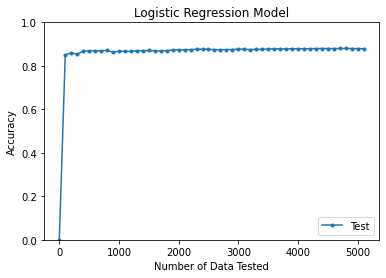

In [ ]:
plt.plot(test_finalid, test_finalratio, marker = '.')
plt.ylim(0, 1)
plt.title('Logistic Regression Model')
plt.ylabel('Accuracy')
plt.xlabel('Number of Data Tested')
plt.legend(['Test'], loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, Y_test)  
plt.show()